In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from mijngeluid import fft_partitioned
import scipy
import glob
import os.path

print(sd.query_devices())

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Headset Microphone (Arctis 7 Ch, MME (1 in, 0 out)
   2 Headset Microphone (Oculus Virt, MME (1 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Headphones (Arctis 7 Game), MME (0 in, 2 out)
   5 Headphones (Oculus Virtual Audi, MME (0 in, 2 out)
   6 Digital Audio (S/PDIF) (High De, MME (0 in, 2 out)
   7 LG ULTRAWIDE (NVIDIA High Defin, MME (0 in, 2 out)
   8 PLG2788H (NVIDIA High Definitio, MME (0 in, 2 out)
   9 LG ULTRAWIDE (NVIDIA High Defin, MME (0 in, 2 out)
  10 Headset Earphone (Arctis 7 Chat, MME (0 in, 1 out)
  11 Output 1 (OCULUSVAD Wave Speaker Headphone), Windows WDM-KS (0 in, 2 out)
  12 Output 2 (OCULUSVAD Wave Speaker Headphone), Windows WDM-KS (0 in, 2 out)
  13 Input (OCULUSVAD Wave Speaker Headphone), Windows WDM-KS (2 in, 0 out)
  14 Headset Microphone (OCULUSVAD Wave Microphone Headphone), Windows WDM-KS (1 in, 0 out)
  15 Headphones (Arctis 7 Game), Windows WDM-KS (0 in, 2 out)
  

In [5]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from mijngeluid import fft_partitioned
import scipy
import glob
import os.path

print(sd.query_devices()) #checken voor devices
fs = 48000 #Frequentie in Hz
duration = 2 #geluid in seconden
def chirp(fs_Hz, rep_Hz, f0_Hz, f1_Hz, phase_rad=0): #Functie maakt geluidsfragment tussen de frequenties gegeven

    T_s = 1 / rep_Hz # Period of chirp in seconds.
    c = (f1_Hz - f0_Hz) / T_s # Chirp rate in Hz/s.
    n = int(fs_Hz / rep_Hz) # Samples per repetition.
    t_s = np.linspace(0, T_s, n) # Chirp sample times.

    # Phase, phi_Hz, is integral of frequency, f(t) = ct + f0.
    phi_Hz = (c * t_s**2) / 2 + (f0_Hz * t_s) # Instantaneous phase.
    phi_rad = 2 * np.pi * phi_Hz # Convert to radians.
    phi_rad += phase_rad # Offset by user-specified initial phase.
    # return np.exp(1j * phi_rad) # Complex I/Q.
    return np.cos(phi_rad) # Just real, or I, component.

filenum = 1

In [8]:
duration_nt = 10 # Voor nagalmtijd
#opnemen tijdens afspelen  en voor nagalmtijd
arr = sd.playrec(chirp(fs, 0.5, 100, 5000), fs, channels=1, dtype='float64')
sd.wait()
earray =np.zeros_like(arr)
arr2 = sd.playrec(earray, fs, channels=1, dtype='float64')
arr3 = sd.rec(int(duration_nt * fs), samplerate=fs, channels=1, dtype='float64', device=1)
sd.wait()
array_final = np.add(arr, arr2)

#opslaan van data
f = open("array_final" + str(filenum) + ".npy", "wb")
f2 = open("arr3" + str(filenum) + ".npy", "wb")
np.save(f, array_final)
np.save(f2, arr3)

[0.00000000e+00 2.08335503e-05 4.16671007e-05 ... 1.99995833e+00
 1.99997917e+00 2.00000000e+00]


Text(0, 0.5, 'Amplitude [a.u.]')

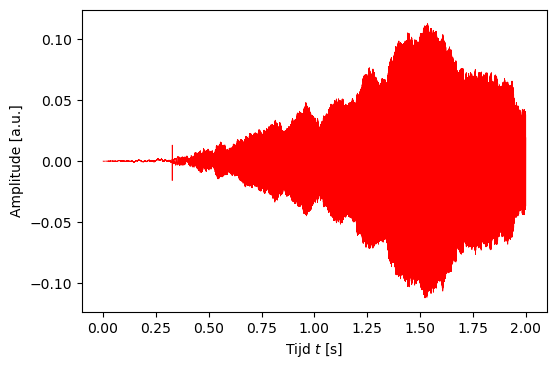

Text(0, 0.5, 'Amplitude [a.u.]')

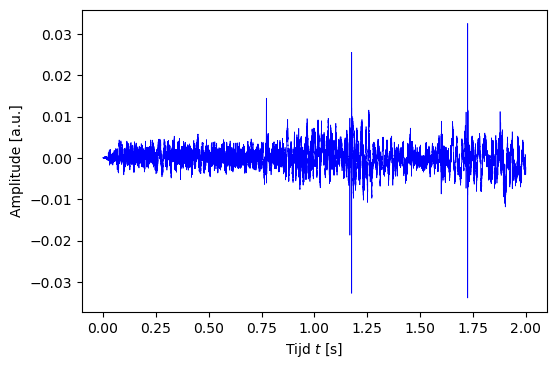

[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.05175781e-05]
 ...
 [-2.77709961e-03]
 [-2.65502930e-03]
 [-2.59399414e-03]]


[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.05175781e-05]
 ...
 [-2.77709961e-03]
 [-2.65502930e-03]
 [-2.59399414e-03]]
